CASE STUDY 2 - REGRESSION

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [18]:
# LOAD DATA

df= pd.read_csv("house_price_data.csv")


In [19]:
#  INFO
print(" INFORMATION ON THE DATASET : ")
df.info

 INFORMATION ON THE DATASET : 


<bound method DataFrame.info of       property_id     neighborhood  distance_to_city_center  \
0     PROP_000001      Forest Glen                      6.6   
1     PROP_000002         Lakeside                      2.6   
2     PROP_000003         Downtown                     10.2   
3     PROP_000004        Riverside                      5.1   
4     PROP_000005          Oakwood                      0.5   
...           ...              ...                      ...   
7995  PROP_007996      Pine Valley                      4.2   
7996  PROP_007997      Garden City                      2.5   
7997  PROP_007998      Pine Valley                      2.5   
7998  PROP_007999        Hillcrest                      2.1   
7999  PROP_008000  Prairie Meadows                      7.3   

      distance_to_metro  distance_to_school  crime_rate  house_age  \
0                   908                 296         1.0         22   
1                    84                  30         1.0         12   
2

In [20]:
# SHAPE
print("SHAPE :",df.shape)


SHAPE : (8000, 25)


In [21]:
# Handling for MISSING VALUES

print("Missing values:\n",df.isnull().sum()) 

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


Missing values:
 property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64


In [22]:
# OUTLIERS

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = df.select_dtypes(include=[np.number]).columns

i=1
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"{i}.'{col}': {len(outliers)} outliers")
    i+=1

print("\n\nOUTLIER DESCRIPTION")
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"\nColumn '{col}': {len(outliers)} outliers")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers detected")

1.'distance_to_city_center': 464 outliers
2.'distance_to_metro': 423 outliers
3.'distance_to_school': 509 outliers
4.'crime_rate': 0 outliers
5.'house_age': 378 outliers
6.'total_area': 193 outliers
7.'bedrooms': 675 outliers
8.'bathrooms': 0 outliers
9.'floors': 0 outliers
10.'garage': 0 outliers
11.'garden': 0 outliers
12.'basement': 0 outliers
13.'balcony': 0 outliers
14.'air_conditioning': 0 outliers
15.'parking_spaces': 0 outliers
16.'listing_duration': 349 outliers
17.'year_sold': 0 outliers
18.'sale_price': 0 outliers


OUTLIER DESCRIPTION

Column 'distance_to_city_center': 464 outliers
      property_id   neighborhood  distance_to_city_center  distance_to_metro  \
13    PROP_000014        Elmwood                     13.6                478   
21    PROP_000022    Forest Glen                     20.2                 50   
25    PROP_000026        Elmwood                     14.7               1073   
59    PROP_000060        Elmwood                     12.2                905   

In [23]:
#DISPLAY SUMMARY 
print("Summary:")
df.describe()

Summary:


,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,air_conditioning,parking_spaces,listing_duration,year_sold,sale_price
count,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.785213,337.536250,148.724875,1.0,14.295125,150.608125,3.359500,2.502875,1.808250,0.698000,0.598875,0.389625,0.504375,0.40050,1.400375,29.411625,2021.591625,725.181400
std,3.953137,350.469891,165.435271,0.0,14.677669,83.534599,1.129345,0.802074,0.600231,0.459154,0.490157,0.487696,0.500012,0.49003,0.922730,29.499529,1.065597,350.856932
min,0.500000,50.000000,30.000000,1.0,0.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2020.000000,80.000000
25%,1.000000,94.750000,35.000000,1.0,4.000000,86.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,8.000000,2021.000000,416.375000
50%,2.500000,221.000000,90.000000,1.0,10.000000,134.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,20.000000,2022.000000,684.600000
75%,5.100000,455.000000,194.000000,1.0,20.000000,196.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,42.000000,2022.000000,1108.375000
max,25.000000,3000.000000,1748.000000,1.0,100.000000,500.000000,6.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,200.000000,2023.000000,1200.000000


Text(0.5, 1.0, 'Sale Price Distribution')

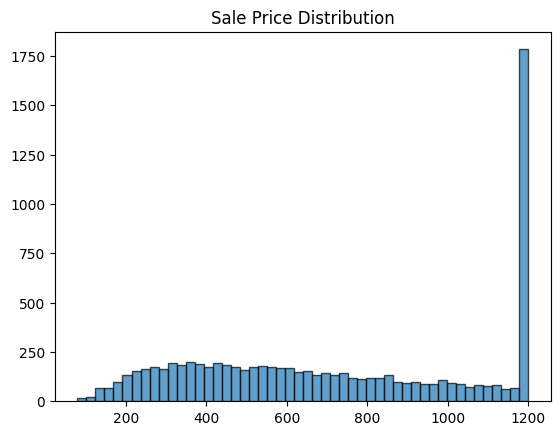

In [24]:
plt.hist(df['sale_price'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Sale Price Distribution')


Text(0.5, 1.0, 'Log Sale Price Distribution')

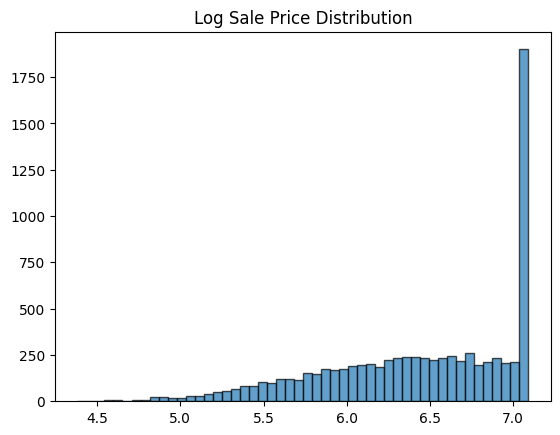

In [25]:
plt.hist(np.log(df['sale_price']), bins=50, alpha=0.7, edgecolor='black')
plt.title('Log Sale Price Distribution')


Text(0.5, 1.0, 'Sale Price due to Neighborhood')

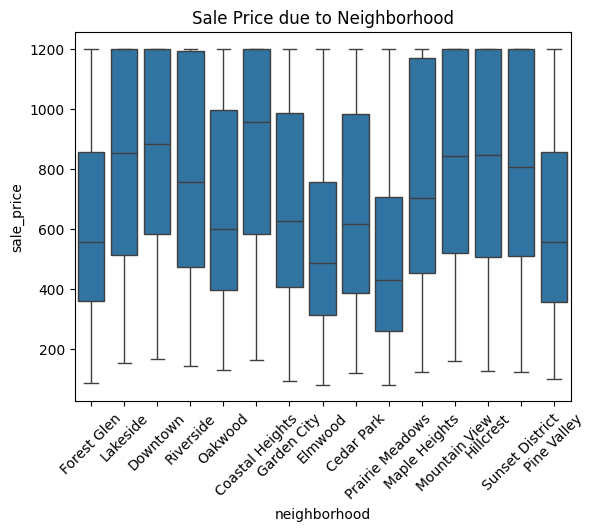

In [26]:
# LOCATION

sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.xticks(rotation=45)
plt.title('Sale Price due to Neighborhood')


Text(0.5, 1.0, 'Sale Price Box Plot')

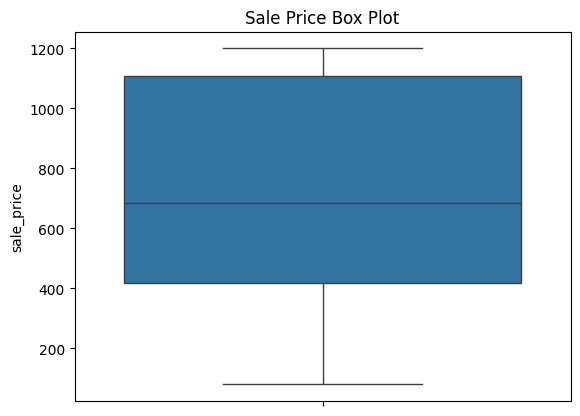

In [27]:

sns.boxplot(y='sale_price', data=df)
plt.title('Sale Price Box Plot')

In [28]:
sk = stats.skew(df['sale_price'])
print(f"Sale Price Skewness: {sk:.4f}")
if abs(sk) > 1:
    print("HIGHLY SKEWED DATA")
elif abs(sk) > 0.5:
    print("RELATIVELY SKEWED DATA")
else:
    print("SYMMETRIC DATA")

Sale Price Skewness: 0.0730
SYMMETRIC DATA


([<matplotlib.axis.XTick at 0x2114687a5d0>,
 [Text(0, 0, 'Coastal Heights'),
  Text(1, 0, 'Downtown'),
  Text(2, 0, 'Mountain View'),
  Text(3, 0, 'Hillcrest'),
  Text(4, 0, 'Lakeside'),
  Text(5, 0, 'Sunset District'),
  Text(6, 0, 'Riverside'),
  Text(7, 0, 'Maple Heights'),
  Text(8, 0, 'Garden City'),
  Text(9, 0, 'Oakwood'),
  Text(10, 0, 'Cedar Park'),
  Text(11, 0, 'Pine Valley'),
  Text(12, 0, 'Forest Glen'),
  Text(13, 0, 'Elmwood'),
  Text(14, 0, 'Prairie Meadows')])

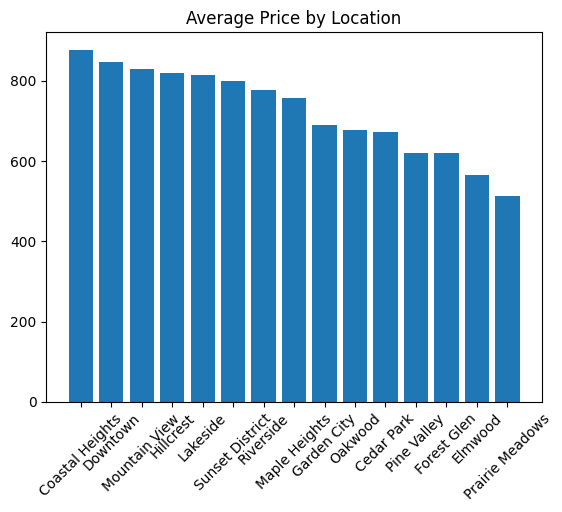

In [29]:
n_price = df.groupby('neighborhood')['sale_price'].mean().sort_values(ascending=False)
plt.bar(range(len(n_price)), n_price.values)
plt.title('Average Price by Location')
plt.xticks(range(len(n_price)), n_price.index, rotation=45)

Text(0.5, 1.0, 'Distance to City Center vs Sale_Price')

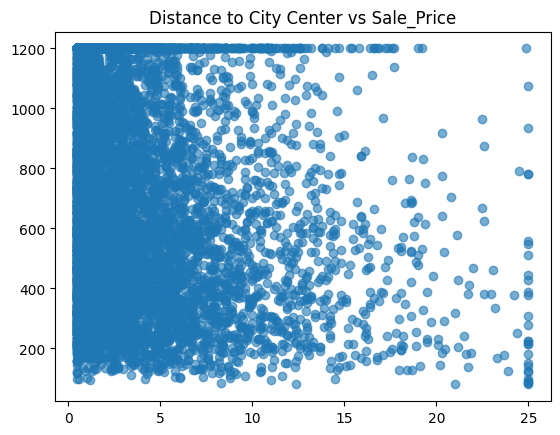

In [30]:
plt.scatter(df['distance_to_city_center'], df['sale_price'], alpha=0.6)
plt.title('Distance to City Center vs Sale_Price')


Text(0.5, 1.0, 'Distance to Metro vs Price')

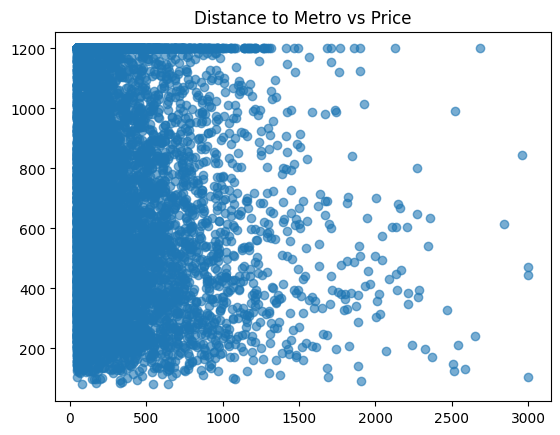

In [31]:
plt.scatter(df['distance_to_metro'], df['sale_price'], alpha=0.6)
plt.title('Distance to Metro vs Price')

Text(0.5, 1.0, 'Distance to School vs Price')

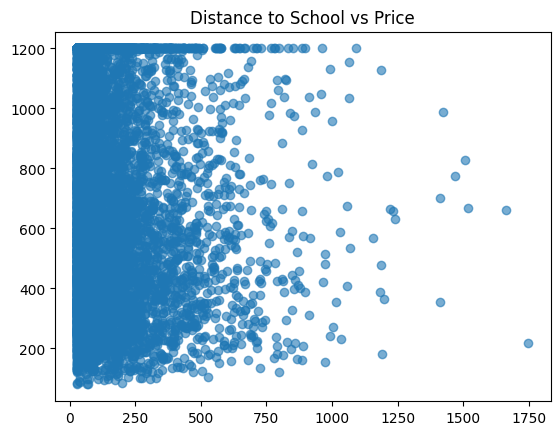

In [32]:
plt.scatter(df['distance_to_school'], df['sale_price'], alpha=0.6)
plt.title('Distance to School vs Price')

Text(0.5, 1.0, 'Crime Rate vs Price')

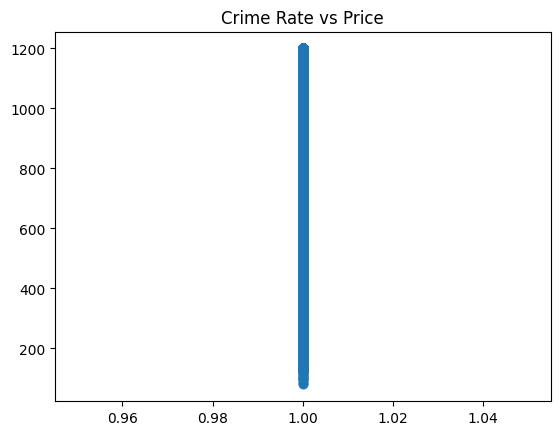

In [33]:
plt.scatter(df['crime_rate'], df['sale_price'], alpha=0.6)
plt.title('Crime Rate vs Price')

Text(0.5, 1.0, 'House Age vs Price')

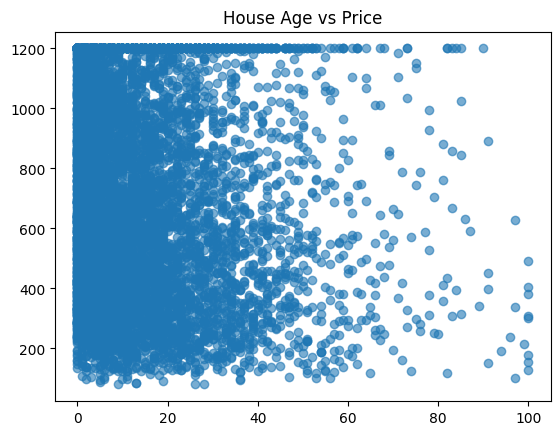

In [34]:
plt.scatter(df['house_age'], df['sale_price'], alpha=0.6)
plt.title('House Age vs Price')

Text(0.5, 1.0, 'Total Area vs Price')

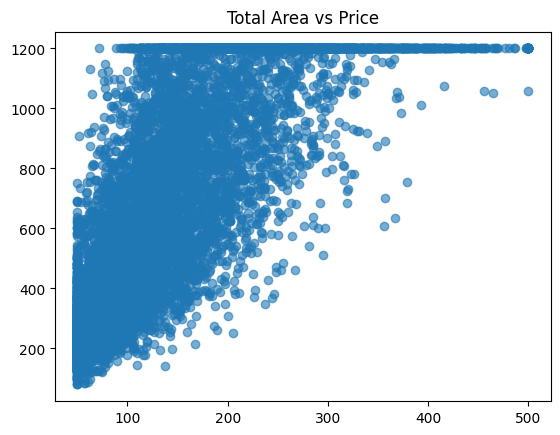

In [35]:
plt.scatter(df['total_area'], df['sale_price'], alpha=0.6)
plt.title('Total Area vs Price')

Text(0.5, 1.0, 'Bedrooms vs Price')

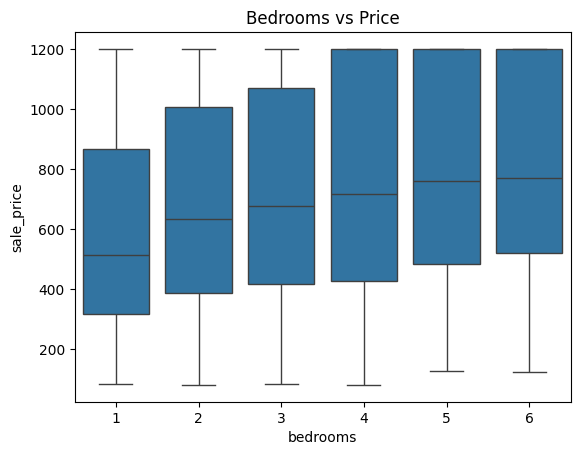

In [36]:
sns.boxplot(data=df, x='bedrooms', y='sale_price')
plt.title('Bedrooms vs Price')

Text(0.5, 1.0, 'Bathrooms vs Price')

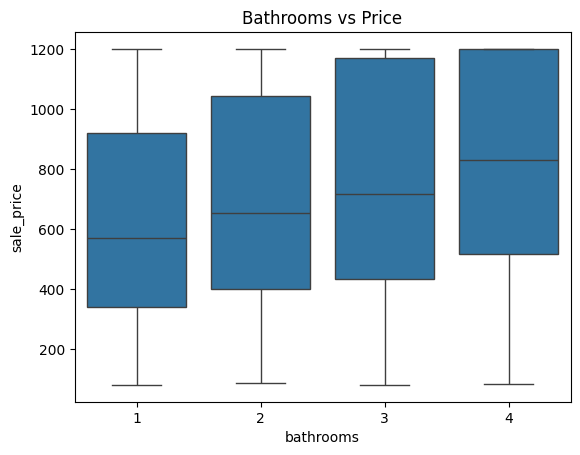

In [37]:
sns.boxplot(data=df, x='bathrooms', y='sale_price')
plt.title('Bathrooms vs Price')

Text(0.5, 1.0, 'Floors vs Price')

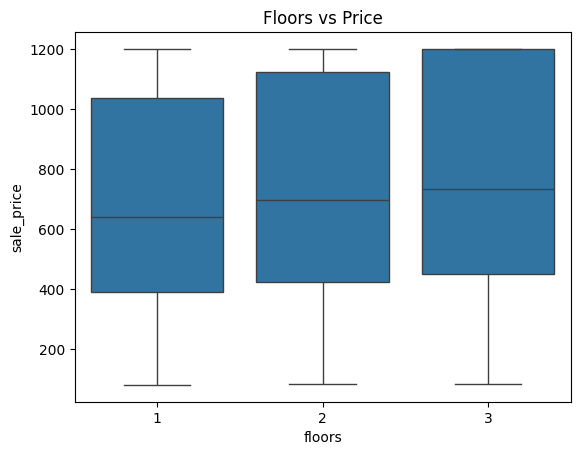

In [38]:
sns.boxplot(data=df, x='floors', y='sale_price')
plt.title('Floors vs Price')

Text(0.5, 1.0, 'Garage vs Price')

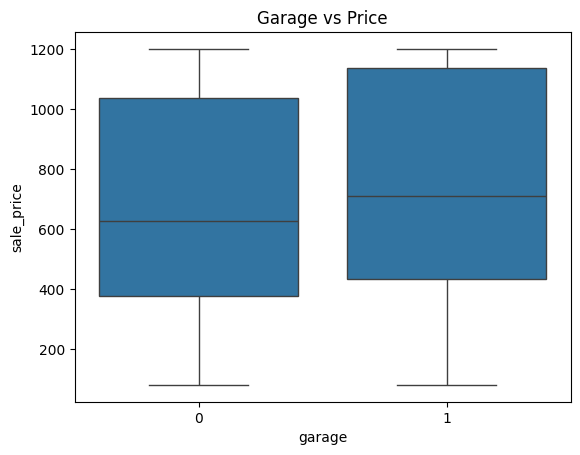

In [39]:
sns.boxplot(data=df, x='garage', y='sale_price')
plt.title('Garage vs Price')

Text(0.5, 1.0, 'Garden vs Price')

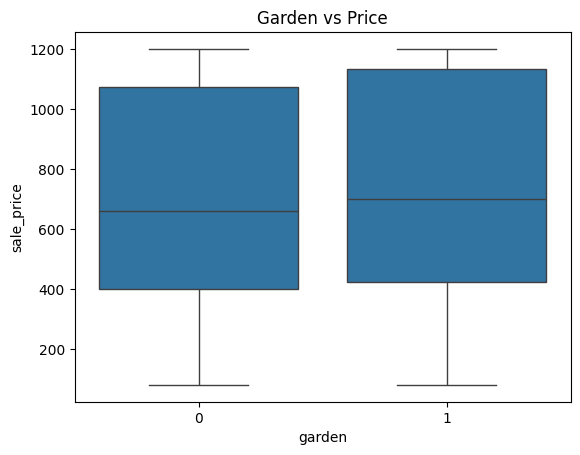

In [40]:
sns.boxplot(data=df, x='garden', y='sale_price')
plt.title('Garden vs Price')

Text(0.5, 1.0, 'Construction Quality vs Price')

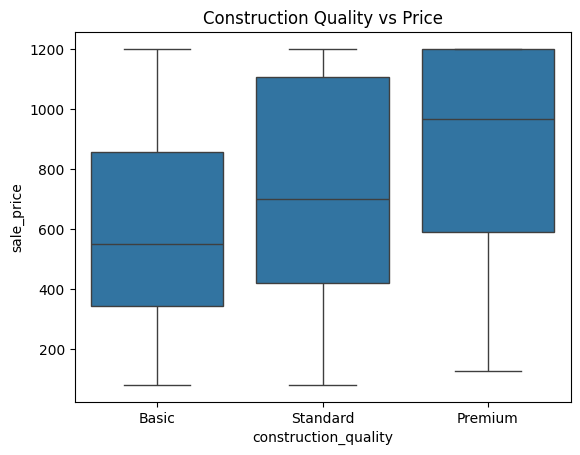

In [41]:
sns.boxplot(data=df, x='construction_quality', y='sale_price')
plt.title('Construction Quality vs Price')

Text(0.5, 1.0, 'Renovation Status vs Price')

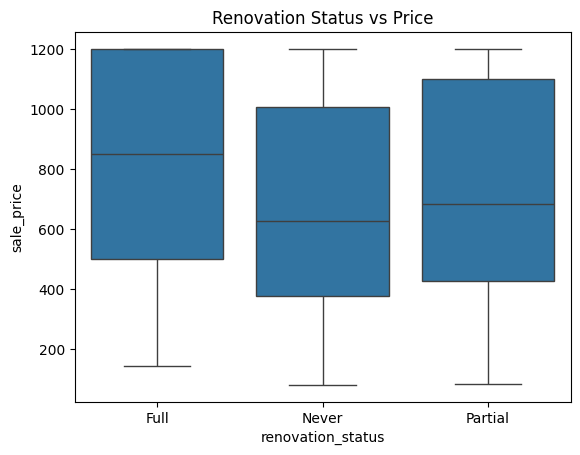

In [42]:
sns.boxplot(data=df, x='renovation_status', y='sale_price')
plt.title('Renovation Status vs Price')

Text(0.5, 1.0, 'Energy Efficiency vs Price')

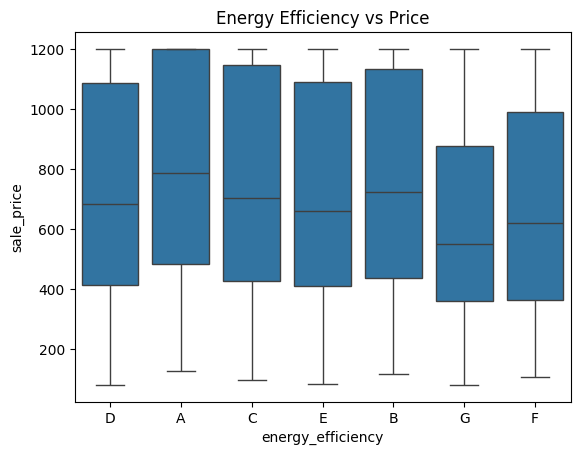

In [43]:
sns.boxplot(data=df, x='energy_efficiency', y='sale_price')
plt.title('Energy Efficiency vs Price')


Text(0.5, 1.0, 'Heating Type vs Price')

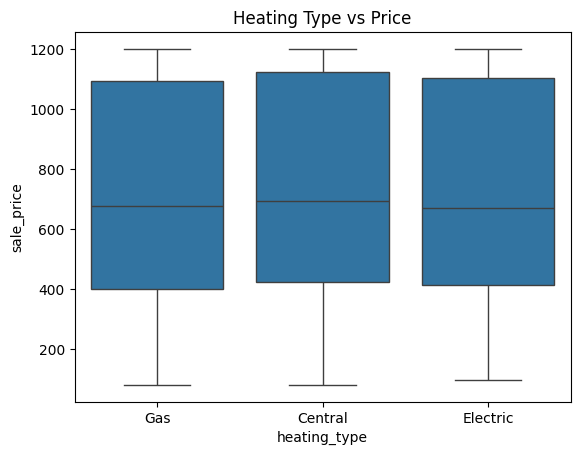

In [44]:
sns.boxplot(data=df, x='heating_type', y='sale_price')
plt.title('Heating Type vs Price')

Text(0.5, 1.0, 'Air Conditioning vs Price')

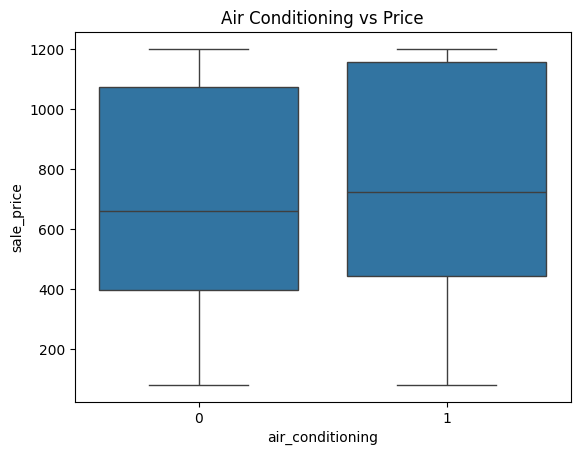

In [45]:
sns.boxplot(data=df, x='air_conditioning', y='sale_price')
plt.title('Air Conditioning vs Price')

Text(0.5, 1.0, 'Parking Spaces vs Price')

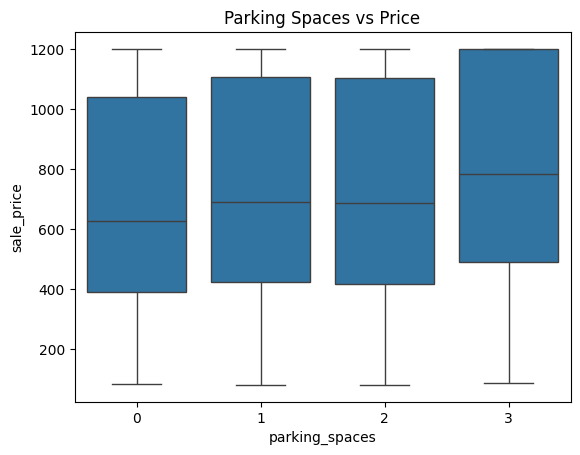

In [46]:
sns.boxplot(data=df, x='parking_spaces', y='sale_price')
plt.title('Parking Spaces vs Price')

Text(0.5, 1.0, 'Average Price by Season')

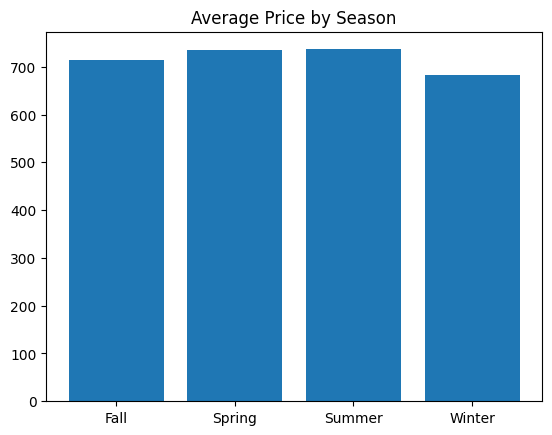

In [47]:
sp = df.groupby('season_sold')['sale_price'].mean()
plt.bar(sp.index, sp.values)
plt.title('Average Price by Season')

Text(0.5, 1.0, 'Average Price by Year')

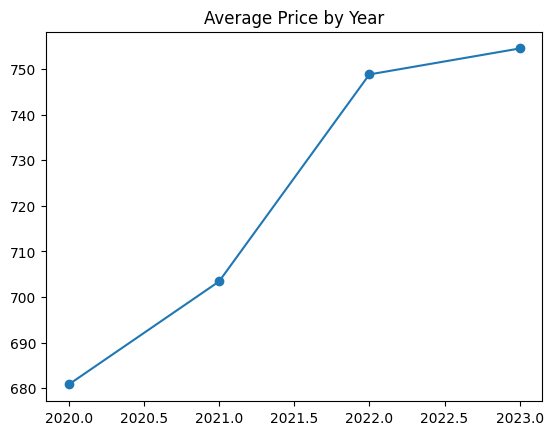

In [48]:
yp = df.groupby('year_sold')['sale_price'].mean()
plt.plot(yp.index, yp.values, marker='o')
plt.title('Average Price by Year')

Text(0.5, 1.0, 'Listing Duration vs Price')

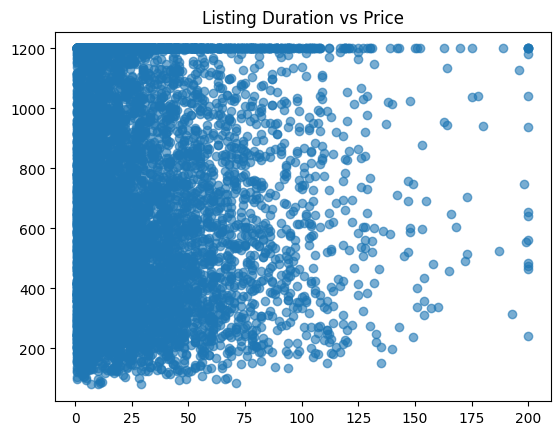

In [49]:
plt.scatter(df['listing_duration'], df['sale_price'], alpha=0.6)
plt.title('Listing Duration vs Price')

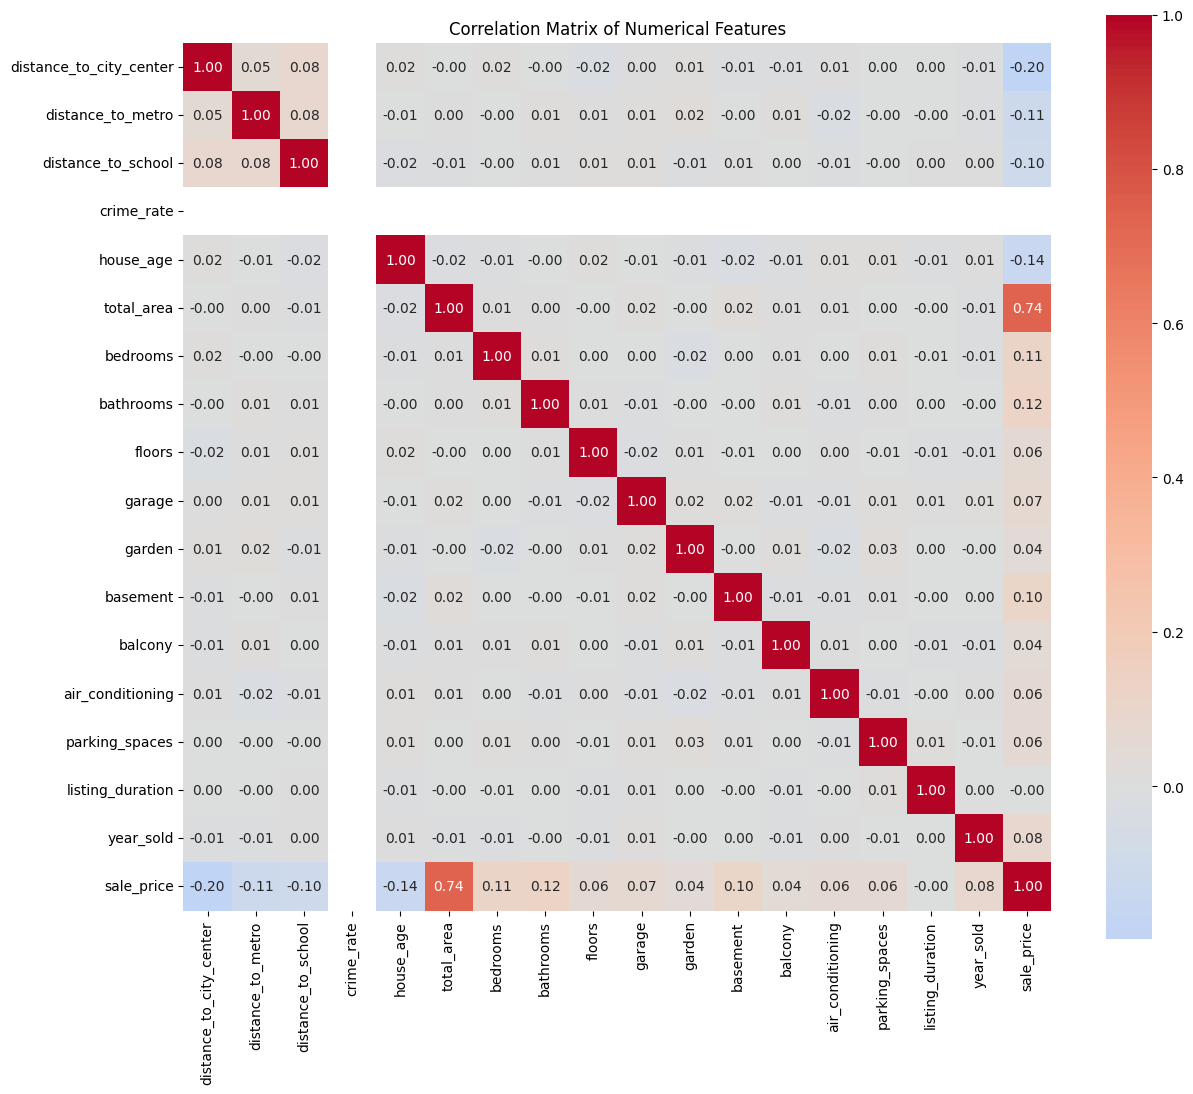

No high correlation pairs found (>0.8)


In [50]:
# Correlation analysis
nc = df.select_dtypes(include=[np.number]).columns
mat = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(mat, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check for multicollinearity
hp = []
for i in range(len(mat.columns)):
    for j in range(i+1, len(mat.columns)):
        if abs(mat.iloc[i, j]) > 0.8:
            hp.append((
                mat.columns[i], 
                mat.columns[j], 
                mat.iloc[i, j]
            ))

if hp:
    print("High correlation pairs (>0.8):")
    for pair in hp:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No high correlation pairs found (>0.8)")

TASK 3

In [51]:
cop = df.copy()
cop['price_per_sqft'] = cop['sale_price'] / cop['total_area']
cop['room_ratio'] = cop['bedrooms'] / cop['bathrooms']
cop['total_amenities'] = (cop['garage'] + cop['garden'] + 
                                   cop['basement'] + cop['balcony'])
cop['avg_distance'] = (cop['distance_to_city_center'] + 
                               cop['distance_to_metro'] + 
                               cop['distance_to_school']) / 3
cop['room_ratio'] = cop['room_ratio'].replace([np.inf, -np.inf], 0)
print("New features created:")
print("- price_per_sqft")
print("- room_ratio")
print("- total_amenities")
print("- avg_distance")

New features created:
- price_per_sqft
- room_ratio
- total_amenities
- avg_distance


In [52]:

label_encoders = {}
categorical_columns = cop.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'property_id': 
        le = LabelEncoder()
        cop[col] = le.fit_transform(cop[col])
        label_encoders[col] = le

print("Encoded values:")
print(list(label_encoders.keys()))

Encoded values:
['neighborhood', 'construction_quality', 'renovation_status', 'heating_type', 'energy_efficiency', 'season_sold']


In [53]:
def rem(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
print(f"THE ACTUAL DATASET LENGTH: {len(cop)}")
cop = rem(cop, 'sale_price')
print(f"OUTLIERS DELETED: {len(cop)}")
print(f"DELETED {len(df) - len(cop)} OUTLIERS")
#print("Multicollinearity check")

THE ACTUAL DATASET LENGTH: 8000
OUTLIERS DELETED: 8000
DELETED 0 OUTLIERS


In [54]:
X = cop.drop(['property_id', 'sale_price'], axis=1)
y = cop['sale_price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:", list(X.columns))

Features shape: (8000, 27)
Target shape: (8000,)

Features: ['neighborhood', 'distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'balcony', 'construction_quality', 'renovation_status', 'heating_type', 'air_conditioning', 'parking_spaces', 'energy_efficiency', 'listing_duration', 'season_sold', 'year_sold', 'price_per_sqft', 'room_ratio', 'total_amenities', 'avg_distance']


In [55]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", xtr.shape)
print("Test set size:", xte.shape)

Training set size: (6400, 27)
Test set size: (1600, 27)


In [56]:
sc = StandardScaler()
xtr_sc = sc.fit_transform(xtr)
xte_sc = sc.transform(xte)

print(" SCALING DONE")

 SCALING DONE


TASK 4

In [57]:
lr = LinearRegression()
lr.fit(xtr_sc, ytr)

print("Linear Regression model trained")
print(f"Number of features: {len(lr.coef_)}")
print(f"Intercept: {lr.intercept_:.2f}")

Linear Regression model trained
Number of features: 27
Intercept: 729.39


TASK 5

In [58]:
# Make predictions
yp = lr.predict(xtr_sc)
ytp = lr.predict(xte_sc)

# Calculate evaluation metrics
def cal(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 30)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
train = cal(ytr, yp, "Training Set")
test = cal(yte, ytp, "Test Set")

Training Set Metrics:
  MAE: 85.46
  MSE: 14594.81
  RMSE: 120.81
  R²: 0.8817
------------------------------
Test Set Metrics:
  MAE: 83.16
  MSE: 13940.31
  RMSE: 118.07
  R²: 0.8855
------------------------------


Text(0.5, 1.0, 'TRAINING :- PREDICTED vs ACTUAL')

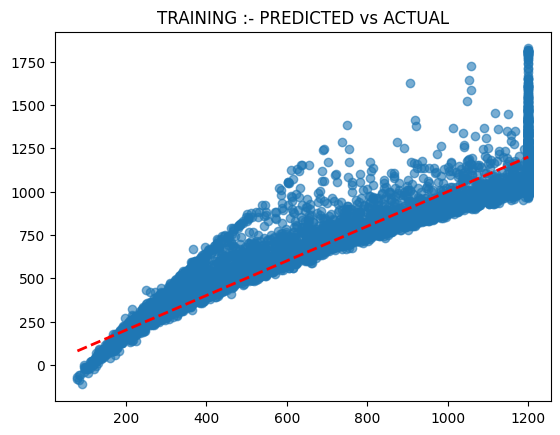

In [59]:
plt.scatter(ytr, yp, alpha=0.6)
plt.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'r--', lw=2)
plt.title('TRAINING :- PREDICTED vs ACTUAL')

Text(0.5, 1.0, 'TRAINING :- PREDICTED vs ACTUAL')

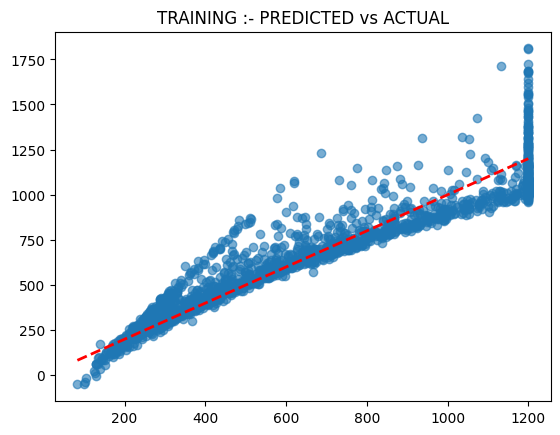

In [60]:
plt.scatter(yte, ytp, alpha=0.6)
plt.plot([yte.min(), yte.max()], [yte.min(), yte.max()], 'r--', lw=2)
plt.title('TRAINING :- PREDICTED vs ACTUAL')

Text(0.5, 1.0, 'TRAINING :- PREDICTED vs RESIDUAL')

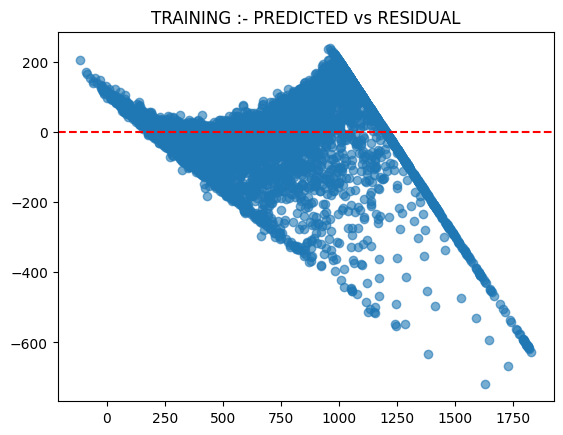

In [ ]:
rtr = ytr - yp
plt.scatter(yp, rtr, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('TRAINING :-RESIDUAL vs PREDICTED')

Text(0.5, 1.0, 'TRAINING :- PREDICTED vs RESIDUAL')

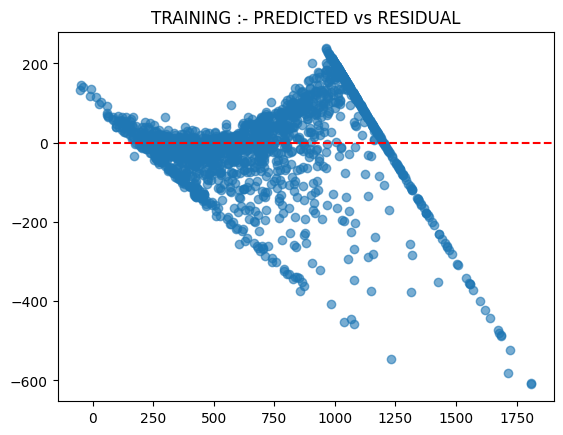

In [62]:
rte = yte - ytp
plt.scatter(ytp, rte, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('TRAINING :- PREDICTED vs RESIDUAL')

Text(0.5, 1.0, 'TRAINING RESIDUAL DISTRIBUTION')

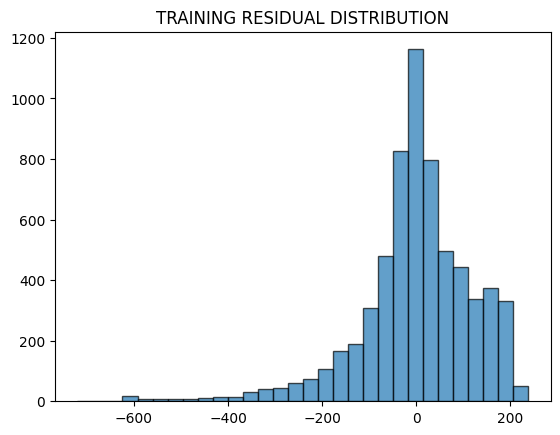

In [63]:
plt.hist(rtr, bins=30, alpha=0.7, edgecolor='black')
plt.title('TRAINING RESIDUAL DISTRIBUTION')

Text(0.5, 1.0, 'TEST RESIDUAL DISTRIBUTION')

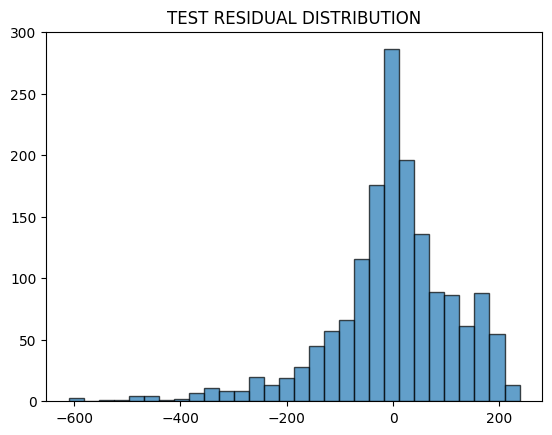

In [64]:
plt.hist(rte, bins=30, alpha=0.7, edgecolor='black')
plt.title('TEST RESIDUAL DISTRIBUTION')

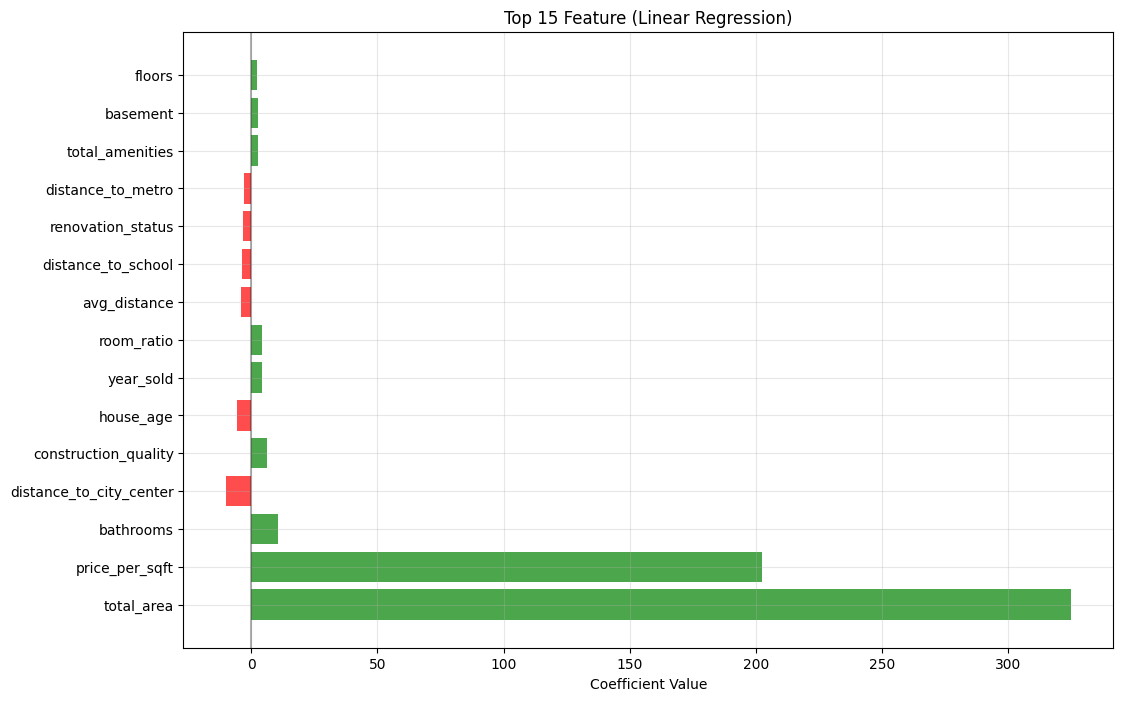

Top 10 Most Important Features:
                    feature  coefficient
6                total_area   325.113259
23           price_per_sqft   202.323997
8                 bathrooms    10.479853
1   distance_to_city_center   -10.151108
14     construction_quality     6.059362
5                 house_age    -5.775683
22                year_sold     4.398508
24               room_ratio     4.280892
26             avg_distance    -4.274066
3        distance_to_school    -3.814891


In [65]:
fea= pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr.coef_,
    'abs_coefficient': np.abs(lr.coef_)
}).sort_values('abs_coefficient', ascending=False)

plt.figure(figsize=(12, 8))
tf = fea.head(15)
colors = ['green' if coef > 0 else 'red' for coef in tf['coefficient']]
plt.barh(range(len(tf)), tf['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(tf)), tf['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature (Linear Regression)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

print("Top 10 Most Important Features:")
print(fea[['feature', 'coefficient']].head(10))

In [66]:
per = pd.DataFrame({
    'Training': train,
    'Test': test
})

print("Model Performance Summary:")
print(per)

# Check for overfitting/underfitting
r2_diff = train['R²'] - test['R²']
print(f"\nR² difference (Train - Test): {r2_diff:.4f}")

if r2_diff > 0.1:
    print("Warning: Possible overfitting detected")
elif test['R²'] < 0.7:
    print("Warning: Model may be underfitting")
else:
    print("Model performance looks good!")

Model Performance Summary:
          Training          Test
MAE      85.460923     83.155294
MSE   14594.809007  13940.306327
RMSE    120.808977    118.069074
R²        0.881650      0.885543

R² difference (Train - Test): -0.0039
Model performance looks good!


In [67]:
si = np.random.choice(len(yte), 10, replace=False)
sp = pd.DataFrame({
    'Actual Price': yte.iloc[si].values,
    'Predicted Price': ytp[si],
    'Absolute Error': np.abs(yte.iloc[si].values - ytp[si])
})
sp['Percentage Error'] = (sp['Absolute Error'] / sp['Actual Price'] * 100)
print("SAMPLE PREDICTIONS:")
print(sp.round(2))

SAMPLE PREDICTIONS:
   Actual Price  Predicted Price  Absolute Error  Percentage Error
0         386.8           393.72            6.92              1.79
1         457.0           461.88            4.88              1.07
2        1086.2           973.37          112.83             10.39
3         714.4           696.97           17.43              2.44
4         287.1           321.79           34.69             12.08
5         230.0           165.67           64.33             27.97
6         678.9           773.24           94.34             13.90
7        1113.8           993.01          120.79             10.85
8         314.5           297.69           16.81              5.34
9         802.2           823.53           21.33              2.66
